In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('gene_expression.csv')
df

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1
...,...,...,...
2995,5.0,6.5,1
2996,3.4,6.6,0
2997,2.7,6.5,0
2998,3.3,5.6,0


<Axes: xlabel='Gene One', ylabel='Gene Two'>

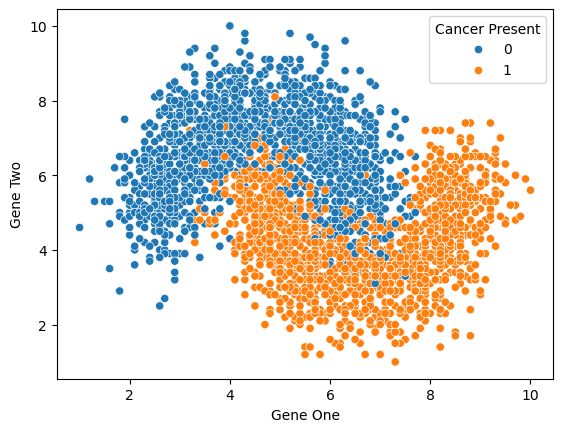

In [4]:
sns.scatterplot(data=df, x='Gene One', y='Gene Two', hue='Cancer Present')

(4.0, 8.0)

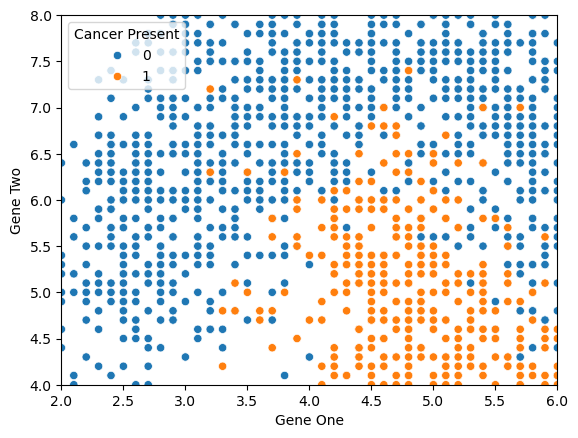

In [5]:
sns.scatterplot(data=df, x='Gene One', y='Gene Two', hue='Cancer Present')
plt.xlim(2,6)
plt.ylim(4,8)

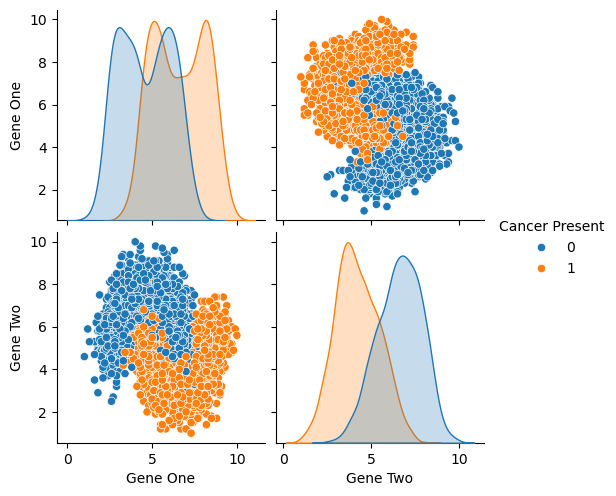

In [6]:
sns.pairplot(data=df, hue='Cancer Present')

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

X = df.drop('Cancer Present', axis=1)
y = df['Cancer Present']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [19]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [21]:
from sklearn.metrics import accuracy_score

In [25]:
#elbow method
test_error_rates = []
for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train, y_train)

    y_pred_test = knn_model.predict(scaled_X_test)
    test_error = 1 - accuracy_score(y_test, y_pred_test)

    test_error_rates.append(test_error)

test_error_rates

[0.09999999999999998,
 0.09833333333333338,
 0.07499999999999996,
 0.08666666666666667,
 0.08166666666666667,
 0.07833333333333337,
 0.07333333333333336,
 0.07499999999999996,
 0.06333333333333335,
 0.06666666666666665,
 0.06999999999999995,
 0.06833333333333336,
 0.06833333333333336,
 0.06833333333333336,
 0.06833333333333336,
 0.06333333333333335,
 0.06499999999999995,
 0.06499999999999995,
 0.05833333333333335,
 0.06166666666666665,
 0.06000000000000005,
 0.05500000000000005,
 0.06000000000000005,
 0.05833333333333335,
 0.06000000000000005,
 0.05666666666666664,
 0.06000000000000005,
 0.06166666666666665,
 0.06333333333333335]

(0.0, 0.11)

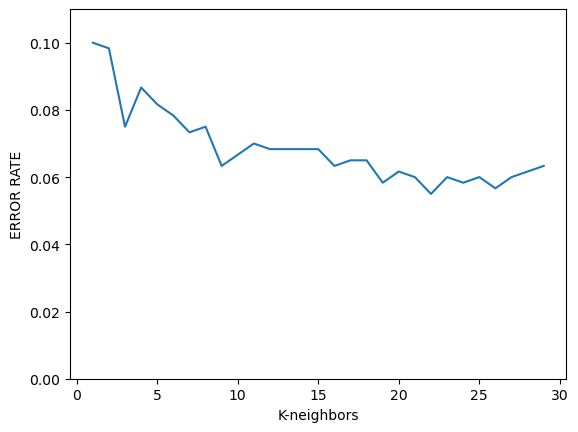

In [27]:
plt.plot(range(1,30), test_error_rates)
plt.ylabel('ERROR RATE')
plt.xlabel('K-neighbors')
plt.ylim(0, 0.11)